In [1]:
from __future__ import division
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [10]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)


# where to load data from?
workstation = True

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

In [7]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 400
c.dt =0.25
c.g = 10
c.d1 = 10
c.d2 = 30000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD

c.tauv=15

c.with_currents = True

# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,4)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(11,95,4)

# cortex.runSimulation()

# c.readSimulation()
# gr.plotWeights(tauv = c.tauv)


# for c.d2 in [60000]:
#     for c.sWII in sWIIList:
#         for c.sG in sGList:
#             for c.LTD in LTDList:
#                 c.LTP = c.ratio * c.LTD
#                 Parallel(n_jobs=8)(delayed(c.runSimulation)(i=0, tauv=c.tauv) for c.tauv in taulist)

# df = pd.DataFrame(columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
#                              'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
#                             'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin', 
#                              'f1End', 'p1End', 'f2End', 'p2End', 
#                              'fBothStart', 'pBothStart', 'fBothEnd', 'pBothEnd', 'key'])
# i=0
# for c.tauv in taulist:
#     for c.d2 in [60000]:
#         for c.sWII in sWIIList:
#             for c.sG in sGList:
#                 for c.LTD in LTDList:
#                     c.LTP = c.ratio * c.LTD
#                     print(c.tauv, c.sWII, c.sG)
#                     c.readSimulation()
#                     csd = gr.valCSD()
#                     if c.tauv <=35 and c.sG<=10:
#                         key=-2
#                     elif c.tauv>35 and c.sG<=10:
#                         key=-1
#                     elif c.tauv<=35 and c.sG>10:
#                         key=2
#                     elif c.tauv>35 and c.sG>10:
#                         key=1
#                     else:
#                         key=0
#                     df.loc[i] = [c.tauv, c.d2, c.sWII, c.sG, c.LTD>1e-8, 
#                                  csd['maxBegin'], csd['argmaxBegin'], csd['maxEnd'], csd['argmaxEnd'],
#                                 csd['f1Begin'][0], csd['f1Begin'][1], csd['f2Begin'][0], csd['f2Begin'][1],
#                                 csd['f1End'][0], csd['f1End'][1], csd['f2End'][0], csd['f2End'][1],
#                                  csd['fBothBegin'][0], csd['fBothBegin'][1], csd['fBothEnd'][0], csd['fBothEnd'][1],
#                                 key]
#                     i+=1
# print(i)
    
# df.to_csv(DIRECTORY+'df-plast-ok.csv')


In [11]:
c.readSimulation(workstation=workstation)
c.gammaN1[-10:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

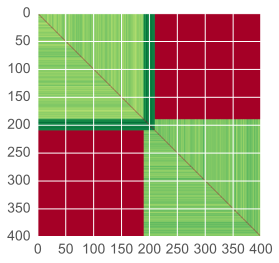

In [14]:
plt.imshow(c.readMatrix(workstation=workstation), cmap = plt.cm.RdYlGn)